In [2]:
from TransportModel import TransportModel
from Agents import StepType
import pandas as pd
import statistics

import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

In [4]:
df = pd.read_csv('waiting_every5_2.csv')
df = df.dropna(subset="Steps") # drop passenger agents
df

,RunId,iteration,Step,num_cars,width,height,multi_pass,seed_int,strategy,Manhattan,AgentID,Steps,WaitingTime
1,0,0,0,1,10,10,False,1,StepType.CLOSEST,0,2,-1.0,NaN
3,0,0,1,1,10,10,False,1,StepType.CLOSEST,0,2,0.0,NaN
5,0,0,2,1,10,10,False,1,StepType.CLOSEST,0,2,1.0,NaN
7,0,0,3,1,10,10,False,1,StepType.CLOSEST,0,2,2.0,NaN
9,0,0,4,1,10,10,False,1,StepType.CLOSEST,0,2,3.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1077136,239,4,999,4,10,10,False,4,StepType.QUEUE,0,8,442.0,NaN
1077138,239,4,1000,4,10,10,False,4,StepType.QUEUE,0,5,544.0,NaN
1077139,239,4,1000,4,10,10,False,4,StepType.QUEUE,0,6,601.0,NaN
1077140,239,4,1000,4,10,10,False,4,StepType.QUEUE,0,7,506.0,NaN


In [5]:
steps = df[df["Step"] == 1000]
display(steps)

,RunId,iteration,Step,num_cars,width,height,multi_pass,seed_int,strategy,Manhattan,AgentID,Steps,WaitingTime
3525,0,0,1000,1,10,10,False,1,StepType.CLOSEST,0,2,778.0,NaN
7085,1,0,1000,1,10,10,False,1,StepType.WAITING,0,2,972.0,NaN
10527,2,0,1000,1,10,10,False,1,StepType.QUEUE,0,2,960.0,NaN
13905,3,0,1000,1,10,10,False,2,StepType.CLOSEST,0,2,969.0,NaN
17351,4,0,1000,1,10,10,False,2,StepType.WAITING,0,2,968.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1071384,238,4,1000,4,10,10,False,4,StepType.WAITING,0,8,491.0,NaN
1077138,239,4,1000,4,10,10,False,4,StepType.QUEUE,0,5,544.0,NaN
1077139,239,4,1000,4,10,10,False,4,StepType.QUEUE,0,6,601.0,NaN
1077140,239,4,1000,4,10,10,False,4,StepType.QUEUE,0,7,506.0,NaN


In [6]:
groups = steps.groupby(["num_cars", "strategy"])
steps_av = groups.mean()
display(steps_av)

RunId  iteration    Step  width  height  \
num_cars strategy                                                    
1        StepType.CLOSEST  100.5        2.0  1000.0   10.0    10.0   
         StepType.QUEUE    102.5        2.0  1000.0   10.0    10.0   
         StepType.WAITING  101.5        2.0  1000.0   10.0    10.0   
2        StepType.CLOSEST  112.5        2.0  1000.0   10.0    10.0   
         StepType.QUEUE    114.5        2.0  1000.0   10.0    10.0   
         StepType.WAITING  113.5        2.0  1000.0   10.0    10.0   
3        StepType.CLOSEST  124.5        2.0  1000.0   10.0    10.0   
         StepType.QUEUE    126.5        2.0  1000.0   10.0    10.0   
         StepType.WAITING  125.5        2.0  1000.0   10.0    10.0   
4        StepType.CLOSEST  136.5        2.0  1000.0   10.0    10.0   
         StepType.QUEUE    138.5        2.0  1000.0   10.0    10.0   
         StepType.WAITING  137.5        2.0  1000.0   10.0    10.0   

                           multi_pass  seed_int  Manhattan  AgentID  \
num_cars strategy                                                     
1        StepType.CLOSEST         0.0       2.5        0.0      2.0   
         StepType.QUEUE           0.0       2.5        0.0      2.0   
         StepType.WAITING         0.0       2.5        0.0      2.0   
2        StepType.CLOSEST         0.0       2.5        0.0      3.5   
         StepType.QUEUE           0.0       2.5        0.0      3.5   
         StepType.WAITING         0.0       2.5        0.0      3.5   
3        StepType.CLOSEST         0.0       2.5        0.0      5.0   
         StepType.QUEUE           0.0       2.5        0.0      5.0   
         StepType.WAITING         0.0       2.5        0.0      5.0   
4        StepType.CLOSEST         0.0       2.5        0.0      6.5   
         StepType.QUEUE           0.0       2.5        0.0      6.5   
         StepType.WAITING         0.0       2.5        0.0      6.5   

                                Steps  WaitingTime  
num_cars strategy                                   
1        StepType.CLOSEST  949.500000          NaN  
         StepType.QUEUE    956.550000          NaN  
         StepType.WAITING  946.450000          NaN  
2        StepType.CLOSEST  847.000000          NaN  
         StepType.QUEUE    864.050000          NaN  
         StepType.WAITING  845.425000          NaN  
3        StepType.CLOSEST  692.633333          NaN  
         StepType.QUEUE    707.983333          NaN  
         StepType.WAITING  694.466667          NaN  
4        StepType.CLOSEST  536.775000          NaN  
         StepType.QUEUE    527.025000          NaN  
         StepType.WAITING  539.375000          NaN

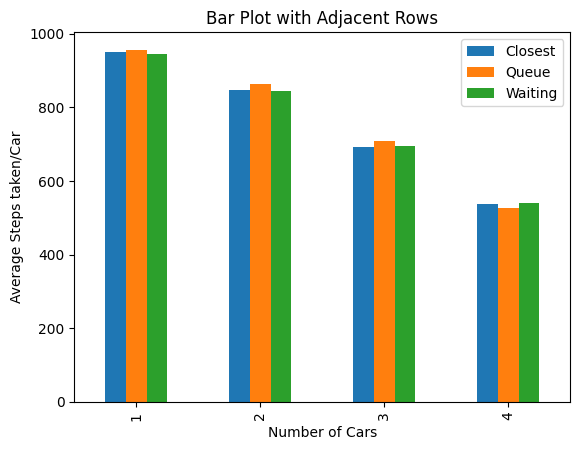

<Figure size 640x480 with 0 Axes>

In [7]:
unstacked = steps_av.unstack()


ax = unstacked["Steps"].plot(kind="bar", stacked=False)
ax.legend(['Closest', 'Queue', "Waiting"])


plt.xlabel('Number of Cars')
plt.ylabel('Average Steps taken/Car')
plt.title('Bar Plot with Adjacent Rows')
plt.show()
plt.savefig('figures/total_steps.png')
